In [ ]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from zipfile import ZipFile

# Import label encoder
from sklearn import preprocessing

from sklearn.model_selection import train_test_split

# PCA
from sklearn.decomposition import PCA

from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model
import tensorflow as tf

from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

from tensorflow.keras.models import Model

In [ ]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [ ]:
# Unzip Training Images Zipped file

with ZipFile('/content/grive/MyDrive/training_images-20211126T092819Z-001.zip', 'r') as zipObj:
  zipObj.extractall('/content/drive/MyDrive/training_images-extracted')

In [ ]:
TRAIN_DIR = '/content/drive/MyDrive/training_images-extracted/training_images'

In [ ]:
# Read images from the extracted training images set, detect all faces one by one using the 'haarcascade_frontalface_default.xml' file from open source and extract metadata for each of those faces and store in a dataframe

X = []
faces_count = []
Img_name = []
df = pd.DataFrame(columns=['Image Name', 'Total_Faces', 'x', 'y', 'w', 'h'])
a = []
b = []
c = []
d = []


face_cascade = cv2.CascadeClassifier('/content/grive/MyDrive/haarcascade_frontalface_default.xml')

for image_name in os.listdir(TRAIN_DIR):
  # read each image inside train directory one by one
  image = cv2.imread(os.path.join(TRAIN_DIR, image_name))
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  for (x,y,w,h) in faces:
    faces_count.append(len(faces))
    Img_name.append(image_name)
    a.append(x)
    b.append(y)
    c.append(w)
    d.append(h)
    image = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    X.append(image)

df['Total_Faces'] = faces_count
df['Image Name'] = Img_name
df['x'] = a
df['y'] = b
df['w'] = c
df['h'] = d

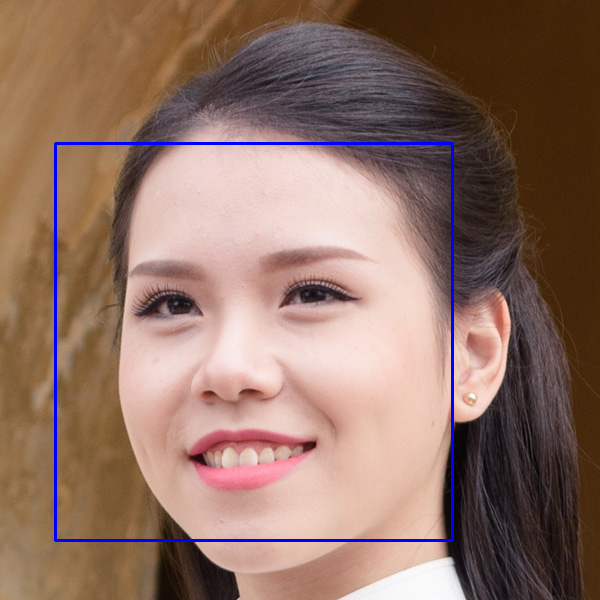

In [ ]:
# Images with localized face

from google.colab.patches import cv2_imshow

cv2_imshow(X[693])

In [ ]:
df.head(200)

,Image Name,Total_Faces,x,y,w,h
0,real_00283.jpg,1,42,126,430,430
1,real_00765.jpg,1,50,83,472,472
2,real_00693.jpg,1,116,158,385,385
3,real_00860.jpg,1,45,28,494,494
4,real_00749.jpg,1,48,123,419,419
...,...,...,...,...,...,...
195,real_00782.jpg,1,94,163,379,379
196,real_00046.jpg,1,56,133,424,424
197,real_01075.jpg,1,97,159,384,384
198,real_00963.jpg,1,197,171,338,338


In [ ]:
# Only one image has 2 faces detected from the dataset of face images, all others have only 1 face detected

df['Total_Faces'].value_counts()

1    692
2      2
Name: Total_Faces, dtype: int64

In [ ]:
# The image with 2 faces detected'

df_new = df[df['Total_Faces'] == 2]
print(df_new)

        Image Name  Total_Faces    x    y    w    h
80  real_00735.jpg            2  507  165   59   59
81  real_00735.jpg            2   73  150  393  393


In [ ]:
df.shape

(694, 6)

In [ ]:
# Saving the output dataframe in .csv format

df.to_csv('file1.csv')